In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import shapefile as shp
import pandas as pd
import math

In [6]:
sf = shp.Reader("NFDB_point/NFDB_point_20160923")
shapes = sf.shapes()

In [7]:
records = sf.records()
records[2][6]

4

In [8]:
records[2][5]

2015

In [9]:
sf.fields

[('DeletionFlag', 'C', 1, 0),
 ['SRC_AGENCY', 'C', 10, 0],
 ['FIRE_ID', 'C', 16, 0],
 ['FIRENAME', 'C', 50, 0],
 ['LATITUDE', 'N', 17, 7],
 ['LONGITUDE', 'N', 17, 7],
 ['YEAR', 'N', 4, 0],
 ['MONTH', 'N', 2, 0],
 ['DAY', 'N', 2, 0],
 ['REP_DATE', 'D', 8, 0],
 ['ATTK_DATE', 'D', 8, 0],
 ['OUT_DATE', 'D', 8, 0],
 ['DECADE', 'C', 10, 0],
 ['SIZE_HA', 'N', 17, 5],
 ['CAUSE', 'C', 6, 0],
 ['PROTZONE', 'C', 25, 0],
 ['FIRE_TYPE', 'C', 16, 0],
 ['MORE_INFO', 'C', 250, 0],
 ['CFS_REF_ID', 'C', 25, 0],
 ['CFS_NOTE', 'C', 50, 0],
 ['CFS_NOTE2', 'C', 200, 0],
 ['ACQ_DATE', 'D', 8, 0],
 ['AG_SRCFILE', 'C', 50, 0]]

In [10]:
fireArr = []
shapeRecs = sf.iterShapeRecords()
for x in shapeRecs:
    fireArr.append(x.record[0:])
    #fireArr.append(x.record[0:1]+x.record[3:7]+x.record[12:13]+x.record[15:17])

In [11]:
df = pd.DataFrame(fireArr, columns=['src_agency', 'fire_id', 'firename','latitude','longitude','year','month','day','rep_date','attk_date','out_date','decade','size_ha','cause','protzone','fire_type','more_info','cfs_ref_id','cfs_note','cfs_note2','acq_date','ag_srcfile'])

In [16]:
#parsing the dataset to only look for the fires tagged with an undetermined cause and one with lightning
df = df[df["cause"] == "L"]
#df = df[(df["cause"] == "L") | (df["cause"] == "U")]
#len(df)

#If we filter for only fires that are tagged as "Wildfire", then we'll only receive 6500 entries.
#This is weird because external research from https://www.getprepared.gc.ca/cnt/hzd/wldfrs-en.aspx
#says that this number is closer to 8000. running the cell below this with the filtered dataset yeilrds these years:
#2015, 2016, 2010, 2011, 2012, 2013, 2014
#We have to assume that the government only started to tag the fires as wildfire since 2010.
#(Afterall we got this dataset from their official site)
#the unparsed dataset has around 400,000 entries
df

,src_agency,fire_id,firename,latitude,longitude,year,month,day,rep_date,attk_date,...,size_ha,cause,protzone,fire_type,more_info,cfs_ref_id,cfs_note,cfs_note2,acq_date,ag_srcfile
64,AB,PWF035,b' ...,56.417067,-116.647217,2015,5,15,20150515,b' ',...,0.70,L,b' ',Wildfire,b' ...,AB-2015-PWF035,b' ...,b' ...,20160614,AB_firepoints2015
65,AB,PWF034,b' ...,56.337167,-116.839333,2015,5,15,20150515,b' ',...,0.20,L,b' ',Wildfire,b' ...,AB-2015-PWF034,b' ...,b' ...,20160614,AB_firepoints2015
72,AB,CWF010,b' ...,51.044850,-115.179167,2015,5,3,20150503,b' ',...,0.01,L,b' ',Wildfire,b' ...,AB-2015-CWF010,b' ...,b' ...,20160614,AB_firepoints2015
93,AB,SWF050,b' ...,56.830267,-115.390833,2015,5,16,20150516,b' ',...,5.50,L,b' ',Wildfire,b' ...,AB-2015-SWF050,b' ...,b' ...,20160614,AB_firepoints2015
96,AB,GWF020,b' ...,54.967167,-118.424050,2015,5,17,20150517,b' ',...,0.02,L,b' ',Wildfire,b' ...,AB-2015-GWF020,b' ...,b' ...,20160614,AB_firepoints2015
197,AB,PWF032,b' ...,56.179617,-116.909167,2015,5,16,20150516,b' ',...,0.05,L,b' ',Wildfire,b' ...,AB-2015-PWF032,b' ...,b' ...,20160614,AB_firepoints2015
213,AB,WWF019,b' ...,54.244467,-116.888733,2015,5,16,20150516,b' ',...,0.01,L,b' ',Wildfire,b' ...,AB-2015-WWF019,b' ...,b' ...,20160614,AB_firepoints2015
235,AB,MWF033,b' ...,56.582850,-110.578217,2015,6,4,20150604,b' ',...,0.01,L,b' ',Wildfire,b' ...,AB-2015-MWF033,b' ...,b' ...,20160614,AB_firepoints2015
237,AB,GWF028,b' ...,54.729783,-119.577383,2015,5,24,20150524,b' ',...,0.02,L,b' ',Wildfire,b' ...,AB-2015-GWF028,b' ...,b' ...,20160614,AB_firepoints2015
239,AB,SWF095,b' ...,56.581917,-115.773183,2015,6,5,20150605,b' ',...,0.23,L,b' ',Wildfire,b' ...,AB-2015-SWF095,b' ...,b' ...,20160614,AB_firepoints2015


In [13]:
df["year"].unique()

array([2015, 2016, 2006, 2008, 2002, 2004, 2001, 2003, 2007, 2005, 2009,
       1997, 1998, 1996, 2000, 1999, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1959,
       1960, 2010, 2011, 2012, 2013, 2014, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1946, 1947, -999, 1948, 1949])

Here I'm looking at fire frequencies throughout the years

In [14]:
years = df.year.unique()
years

array([2015, 2016, 2006, 2008, 2002, 2004, 2001, 2003, 2007, 2005, 2009,
       1997, 1998, 1996, 2000, 1999, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1959,
       1960, 2010, 2011, 2012, 2013, 2014, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1946, 1947, -999, 1948, 1949])

In [15]:
df["fire_type"].unique()

array(['Wildfire', 'Mutual Aid', 'Surface', 'Ground', 'Crown',
       b'                ', 'Smoke Chase', 'Fire', 'Duplicate', 'Nuisance',
       'Unknown', 'Test/Training', 'IFR', 'OFR', 'Forest', 'Grass', 'Dump',
       'Other'], dtype=object)

In [8]:
len(df[(df["fire_type"] == "Wildfire") | (df["fire_type"] == "                ")])

NameError: name 'df' is not defined

In [17]:
years = df.year.unique()
years.sort()
newYears = []
for x in years:
    count = len(df[df["year"] == x])
    newYears.append((str(x) + " " + str(count)))
newYears[:5]

['1946 1', '1947 4', '1948 2', '1949 1', '1950 364']

In [18]:
years.sort()
fireX = []
fireY = []
for x in years:
    if x != -999 and x != 2016:
        count = len(df[df["year"] == x])
        fireX.append(int(x))
        fireY.append(int(int(count)))

In [31]:
fireY[:5]

[1, 4, 2, 1, 364]

best fit line:
y = -110057.93 + 56.75x


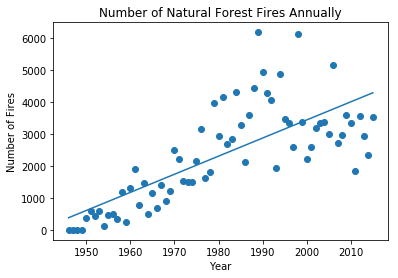

In [30]:
#plotting the fire frequencies
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / float(denum)
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b


a, b = best_fit(fireX, fireY)


# plot points and fit line
import matplotlib.pyplot as plt
plt.scatter(fireX, fireY)
yfit = [a + b * xi for xi in fireX]
plt.ylabel('Number of Fires')
plt.xlabel('Year')
plt.title("Number of Natural Forest Fires Annually")
plt.plot(fireX, yfit)
#plt.plot(2050, yfit)
plt.show()

In [34]:
b

56.75269005336366

Trying to find out the length of time the dataset has been to add on the climate data

Here we are matching the nearest weather station to each fire to determine the weather conditions at the time of the fire

In [12]:
#put a list of all stations into a df
stations = []
theFile = open('weather_station_locations.csv')
for line in theFile:
    line = line[:-1]#get rid of newline
    stations.append((line.replace('"', "")).split(","))
headers = stations[3]
stations = stations[4:]
stationsDf = pd.DataFrame(stations, columns=["name","province","climate_id","station_id","wmo_id","tc_id","latitude_decimal","longitude_decimal","latitude","longitude","elevation","first_year","last_year","hly_first_year","hly_last year","dly_first_year","dly_last_year","mly_first_year","mly_last_year"])
stationsDf

,name,province,climate_id,station_id,wmo_id,tc_id,latitude_decimal,longitude_decimal,latitude,longitude,elevation,first_year,last_year,hly_first_year,hly_last year,dly_first_year,dly_last_year,mly_first_year,mly_last_year
0,BEAVER LAKE,BRITISH COLUMBIA,1010774,18,,,48.5,-123.35,483000000,-1232100000,61,1894,1952,,,1894,1952,1894,1952
1,BECHER BAY,BRITISH COLUMBIA,1010780,19,,,48.33,-123.63,482000000,-1233800000,12.2,1956,1966,,,1956,1966,1956,1966
2,BRENTWOOD BAY 2,BRITISH COLUMBIA,1010960,20,,,48.6,-123.47,483600000,-1232800000,38,1987,1997,,,1987,1997,1987,1997
3,BRENTWOOD CLARKE ROAD,BRITISH COLUMBIA,1010961,21,,,48.57,-123.45,483400000,-1232700000,30.5,1972,1980,,,1972,1980,1972,1980
4,BRENTWOOD W SAANICH RD,BRITISH COLUMBIA,1010965,22,,,48.57,-123.43,483400000,-1232600000,91.4,1960,1970,,,1960,1970,1960,1970
5,CENTRAL SAANICH VEYANESS,BRITISH COLUMBIA,1011467,25,,,48.58,-123.42,483500000,-1232500000,53.3,1963,1994,,,1963,1994,1963,1994
6,CENTRAL SAANICH ISL VIEW,BRITISH COLUMBIA,10114F6,24,,,48.57,-123.39,483424030,-1232331660,38,1970,2008,,,1970,2008,1970,2007
7,CENTRAL SAANICH TANNER,BRITISH COLUMBIA,10114FF,23,,,48.55,-123.4,483300000,-1232400000,88.4,1966,1968,,,1966,1968,1966,1968
8,CHEMAINUS,BRITISH COLUMBIA,1011500,26,,,48.94,-123.74,485606080,-1234430000,75,1919,2016,,,1919,2016,1919,2007
9,COBBLE HILL,BRITISH COLUMBIA,1011743,27,,,48.68,-123.6,484100000,-1233600000,99,1990,1994,,,1990,1994,1990,1994


In [13]:
tempStations = pd.read_csv('climate/monthly_mean_temp/Temperature_Stations.csv')
tempStations.head()

,prov,station_name,stnid,beg_yr,beg_mon,end_yr,end_mon,lat,long,elev,stns_joined
0,BC,AGASSIZ,1100120,1893,1,2015,12,49.25,-121.77,15,N
1,BC,ATLIN,1200560,1905,8,2015,12,59.57,-133.70,674,N
2,BC,BARKERVILLE,1090660,1888,2,2015,3,53.07,-121.52,1265,N
3,BC,BEAVERDELL,1130771,1939,1,2006,9,49.48,-119.05,838,Y
4,BC,BELLA COOLA,1060841,1895,5,2015,12,52.37,-126.68,18,Y


In [14]:
#find the nearest station for each fire. Note: we copied and pasted this code into multiple notebooks on seperate machines
#to speed up proccessing time. We did this for the wind, temperature, and precipitation stations respectively
stationIds = []
amount = len(df)
count = 0
lastPerc = 0
for row in df.iterrows():
    lat = float(row[1][3])
    lon = float(row[1][4])
    minDist = 100
    stationId = ""
    fireId = row[1][1]
    
    for station in tempStations.iterrows():
        slat = float(station[1][7])
        slon = float(station[1][8])
        dist = math.sqrt(((lat-slat)**2) + ((lon-slon)**2))
        if dist < minDist:
            minDist = dist
            stationId = station[1][2]
    count = count + 1
    curPerc = int(float((count)/float(amount))*100)
    if curPerc != lastPerc:
        lastPerc = curPerc
        print curPerc
    stationIds.append([fireId, stationId])
stationIds

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-14-20f8ecc2d64e>, line 25)

In [15]:
#now we look into the files and retrieve the values for each month (again, this is repeated on multiple machines)
pdf = df
amount = len(df)
count = 0
lastPerc = 0
for index, fire in pdf.iterrows():
    for x in stationIds:
        if (str(x[0]) == str(fire[1])):
            theFile=open("climate/monthly_mean_temp/mm"+str(x[1]) + ".txt")
            file=[]
            for line in theFile:
                file.append(line)
            for x in file[4:]:
                x = x.split(",")
                if (str(x[0]).strip() == str(fire[5])):
                    pdf.set_value(index,"temp",x[(int(fire[6])*2)+1])
                    break
            count=count+1
            curPerc = int(float((count)/float(amount))*100)
            if curPerc != lastPerc:
                lastPerc = curPerc
                print curPerc
            break
#we save the data for future use
pdf.to_pickle("monthly_temp_df")

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-15-ef5a8cca53a0>, line 22)

In [16]:
#test to see if we can read the save
monthly_temp_df = pd.read_pickle("monthly_temp_df")
monthly_precipitation_df = pd.read_pickle("monthly_precipitation_df")
monthly_wind_speed_df = pd.read_pickle("monthly_wind_speed_df")
monthly_temp_df.head()

,src_agency,fire_id,firename,latitude,longitude,year,month,day,rep_date,attk_date,...,protzone,fire_type,more_info,cfs_ref_id,cfs_note,cfs_note2,acq_date,ag_srcfile,date,temp
14,AB,EWF008,...,53.531700,-116.807567,2015,4,17,"[2015, 4, 17]",,...,,Wildfire,...,AB-2015-EWF008,...,...,"[2016, 6, 14]",AB_firepoints2015,2015 4 17,9.2
19,AB,EWF002,...,53.614980,-116.351960,2015,4,9,"[2015, 4, 9]",,...,,Wildfire,...,AB-2015-EWF002,...,...,"[2016, 6, 14]",AB_firepoints2015,2015 4 9,9.2
64,AB,PWF035,...,56.417067,-116.647217,2015,5,15,"[2015, 5, 15]",,...,,Wildfire,...,AB-2015-PWF035,...,...,"[2016, 6, 14]",AB_firepoints2015,2015 5 15,15.6
65,AB,PWF034,...,56.337167,-116.839333,2015,5,15,"[2015, 5, 15]",,...,,Wildfire,...,AB-2015-PWF034,...,...,"[2016, 6, 14]",AB_firepoints2015,2015 5 15,15.6
72,AB,CWF010,...,51.044850,-115.179167,2015,5,3,"[2015, 5, 3]",,...,,Wildfire,...,AB-2015-CWF010,...,...,"[2016, 6, 14]",AB_firepoints2015,2015 5 3,13.6


In [17]:
monthly_precipitation_df = monthly_precipitation_df[["precipitation","fire_id"]]

In [18]:
monthly_wind_speed_df = monthly_wind_speed_df[["wind_speed","fire_id"]]

In [19]:
len(monthly_wind_speed_df)

183849

In [20]:
len(monthly_temp_df)

183758

In [21]:
monthly_precipitation_df.head()

,precipitation,fire_id
14,-9999.9,EWF008
19,-9999.9,EWF002
64,-9999.9,PWF035
65,-9999.9,PWF034
72,-9999.9,CWF010


In [152]:
masterDF = monthly_temp_df.merge(monthly_precipitation_df, on="fire_id")
masterDF = masterDF.merge(monthly_wind_speed_df, on="fire_id")

In [153]:
len(masterDF)

8451557

In [154]:
list(masterDF.columns.values)

['src_agency',
 'fire_id',
 'firename',
 'latitude',
 'longitude',
 'year',
 'month',
 'day',
 'rep_date',
 'attk_date',
 'out_date',
 'decade',
 'size_ha',
 'cause',
 'protzone',
 'fire_type',
 'more_info',
 'cfs_ref_id',
 'cfs_note',
 'cfs_note2',
 'acq_date',
 'ag_srcfile',
 'date',
 'temp',
 'precipitation',
 'wind_speed']

In [17]:
fire_regions_df = pd.read_pickle("fire_regions_df")

In [18]:
fire_regions_df = fire_regions_df[["fire_id","forest_region","burn_rate"]]
fire_regions_df.head()

,fire_id,forest_region,burn_rate
14,EWF008,1.0,1.0
19,EWF002,1.0,1.0
64,PWF035,1.0,1.0
65,PWF034,1.0,1.0
72,CWF010,2.0,1.0


In [160]:
justFeatures = masterDF[["fire_id","size_ha","temp","precipitation","wind_speed","month"]]

In [165]:
justFeatures.to_pickle("justFeatures1")

In [4]:
new = pd.read_pickle("justFeatures1")

In [5]:
len(new)

8451557

In [6]:
features_df = new.drop_duplicates(subset='fire_id', keep="last")

In [10]:
final_features_df = features_df.merge(fire_regions_df)

In [190]:
final_features_df.to_pickle("final_features_df")

In [2]:
final_features_df = pd.read_pickle("final_features_df")

In [3]:
len(final_features_df)

150359

In [6]:
final_features_df = final_features_df[["fire_id","size_ha","temp","precipitation","wind_speed","month"]]

In [4]:
fire_regions_df = pd.read_pickle("fire_regions_df")

In [5]:
fire_regions_df = fire_regions_df[["burn_rate","fire_id"]]

In [7]:
final_features_df = final_features_df.merge(fire_regions_df, on="fire_id")

In [8]:
final_features_df.head()

,fire_id,size_ha,temp,precipitation,wind_speed,month,burn_rate
0,EWF008,0.04,9.2,-9999.9,NaN,4,1.0
1,EWF002,0.20,9.2,-9999.9,NaN,4,1.0
2,PWF035,0.20,18.1,-9999.9,-9999.9,6,1.0
3,PWF035,0.20,18.1,-9999.9,-9999.9,6,1.0
4,PWF035,0.20,18.1,-9999.9,-9999.9,6,1.0


In [9]:
fire_regions_df.head()

,burn_rate,fire_id
14,1.0,EWF008
19,1.0,EWF002
64,1.0,PWF035
65,1.0,PWF034
72,1.0,CWF010


In [10]:
testDf = final_features_df[final_features_df["burn_rate_y"] == 3.0]

KeyError: 'burn_rate_y'

In [16]:
testDf.head()

NameError: name 'testDf' is not defined

In [11]:
final_features_df = final_features_df.drop_duplicates(subset='fire_id', keep="last")

In [26]:
len(final_features_df)

144624

In [28]:
final_features_df["size_ha"].describe()

count    144624.000000
mean        549.073083
std        7379.068840
min          -1.000000
25%           0.100000
50%           0.100000
75%           1.000000
max      857600.000000
Name: size_ha, dtype: float64

In [30]:
medium = final_features_df[final_features_df["size_ha"] > 0.2]

In [31]:
medium["wind_speed"].min()

'      5.0'

In [172]:
final_features_df["forest_region"].unique()

array([  1.,   2.,   3.,   8.,  14.,   9.,   4.,  16.,   5.,   6.,   7.,
        10.,  13.,  11.,  12.,  15.])

In [19]:
final_features_df = final_features_df[pd.notnull(final_features_df['wind_speed'])]
final_features_df = final_features_df[pd.notnull(final_features_df['temp'])]
final_features_df = final_features_df[pd.notnull(final_features_df['size_ha'])]
final_features_df = final_features_df[pd.notnull(final_features_df['month'])]
final_features_df = final_features_df[pd.notnull(final_features_df['forest_region'])]
final_features_df = final_features_df[pd.notnull(final_features_df['burn_rate'])]
final_features_df = final_features_df.dropna()
final_features_df['burn_rate'] = final_features_df['burn_rate'].astype(str)
final_features_df['month'] = final_features_df['month'].astype(str)

KeyError: 'forest_region'

In [20]:
final_features_df.head()

,fire_id,size_ha,temp,precipitation,wind_speed,month,burn_rate
9,PWF035,0.2,18.1,-9999.9,-9999.9,6,1.0
16,PWF034,0.5,18.1,-9999.9,-9999.9,6,1.0
19,EWF010,5.7,13.1,-9999.9,6.6,5,1.0
28,MWF007,1.1,19.0,-9999.9,11.0,6,1.0
33,SWF050,2.0,18.1,-9999.9,-9999.9,6,1.0


In [136]:
final_features_df = final_features_df.reindex(["size_ha","fire_id","temp","precipitation","wind_speed","month","forest_region","burn_rate"])

In [137]:
cols_to_transform

['month', 'burn_rate']

In [108]:
final_features_df_with_dummies = pd.get_dummies( final_features_df, columns = cols_to_transform )

In [110]:
final_features_df_with_dummies.head()

,fire_id,size_ha,temp,precipitation,wind_speed,forest_region,month_0,burn_rate_0
size_ha,0,0.0,0.0,0,0,0.0,1.0,1.0
fire_id,0,0.0,0.0,0,0,0.0,1.0,1.0
temp,0,0.0,0.0,0,0,0.0,1.0,1.0
precipitation,0,0.0,0.0,0,0,0.0,1.0,1.0
wind_speed,0,0.0,0.0,0,0,0.0,1.0,1.0


In [93]:
from sklearn import datasets, linear_model

In [22]:
columnsTitles=["size_ha","fire_id","temp","precipitation","wind_speed","month","burn_rate"]
final_features_df=final_features_df.reindex(columns=columnsTitles)

In [24]:
c = final_features_dfx

In [21]:
c.head()

NameError: name 'c' is not defined

In [264]:
msk = np.random.rand(len(final_features_df)) < 0.8
train = final_features_df[msk]
test = final_features_df[~msk]

In [242]:
train.head()

,size_ha,fire_id,temp,precipitation,wind_speed,month_0,month_1,month_10,month_11,month_12,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,burn_rate_1.0,burn_rate_2.0,burn_rate_3.0
1,0.20,EWF002,9.2,-9999.9,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
115,0.01,CWF010,13.6,-9999.9,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
119,5.70,EWF010,13.1,-9999.9,6.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
200,1.10,MWF007,19.0,-9999.9,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
201,0.50,SWF042,14.8,-9999.9,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [260]:
trainx = train
#del trainx["size_ha"]
trainy = train["size_ha"]

In [261]:
del trainx["size_ha"]

In [262]:
testx = test
del testx["size_ha"]

In [265]:
testy = test["size_ha"]
testy.head()

363     5.56
1217    0.01
1418    0.01
1535    0.01
1701    0.19
Name: size_ha, dtype: float64

In [266]:
regr = linear_model.LinearRegression()

In [295]:
trainx.dtypes

fire_id           object
temp             float64
precipitation     object
wind_speed        object
month_0          float64
month_1          float64
month_10         float64
month_11         float64
month_12         float64
month_2          float64
month_3          float64
month_4          float64
month_5          float64
month_6          float64
month_7          float64
month_8          float64
month_9          float64
burn_rate_1.0    float64
burn_rate_2.0    float64
burn_rate_3.0    float64
dtype: object

In [305]:
trainx.apply(to_numeric)

NameError: name 'to_numeric' is not defined

In [296]:
regr.fit(trainx, trainy)

ValueError: invalid literal for float(): 2015WB54

In [1]:
train.head()

NameError: name 'train' is not defined

now that we have prepared the data, we will run this through a tensorflow model to predict the size of a forest fire based on weather conditions

In [81]:
import tensorflow as tf

# Categorical base columns.
month = tf.contrib.layers.sparse_column_with_keys(column_name="month", keys=["1","2","3","4","5","6","7","8","9","10","11","12"])
burn_rate = tf.contrib.layers.sparse_column_with_keys(column_name="burn_rate", keys=["1.0","2.0","3.0"])

# Continuous base columns.
temp = tf.contrib.layers.real_valued_column("temp")
precipitation = tf.contrib.layers.real_valued_column("precipitation")
wind = tf.contrib.layers.real_valued_column("wind_speed")

In [82]:
wide_columns = [
month, burn_rate,
tf.contrib.layers.crossed_column([month,burn_rate], hash_bucket_size=int(1e4))]

In [83]:
deep_columns = [
  tf.contrib.layers.embedding_column(month, dimension=8),
  tf.contrib.layers.embedding_column(burn_rate, dimension=8),
  temp, precipitation, wind, month, burn_rate]

In [84]:
import tempfile
model_dir = tempfile.mkdtemp()
m = tf.contrib.learn.DNNLinearCombinedClassifier(
    model_dir=model_dir,
    linear_feature_columns=wide_columns,
    dnn_feature_columns=deep_columns,
    dnn_hidden_units=[100, 50])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'save_summary_steps': 100, '_num_ps_replicas': 0, '_task_type': None, '_environment': 'local', '_is_chief': True, 'save_checkpoints_secs': 600, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f7624d1d190>, 'tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_task_id': 0, 'tf_random_seed': None, 'keep_checkpoint_every_n_hours': 10000, '_evaluation_master': '', 'save_checkpoints_steps': None, '_master': '', 'keep_checkpoint_max': 5}


In [85]:
#split the df into train and test

msk = np.random.rand(len(final_features_df)) < 0.8
train = final_features_df[msk]
test = final_features_df[~msk]

In [86]:
CONTINUOUS_COLUMNS = ["precipitation", "temp","wind_speed"]
COLUMNS = ["precipitation", "temp", "wind_speed","month","burn_rate"]
LABEL_COLUMN = 'label'
CATEGORICAL_COLUMNS = ["month", "burn_rate"]

def input_fn(dfe):
  # Creates a dictionary mapping from each continuous feature column name (k) to
  # the values of that column stored in a constant Tensor.
  continuous_cols = {k: tf.constant(dfe[k].values)
                     for k in CONTINUOUS_COLUMNS}
  # Creates a dictionary mapping from each categorical feature column name (k)
  # to the values of that column stored in a tf.SparseTensor.
  categorical_cols = {k: tf.SparseTensor(
      indices=[[i, 0] for i in range(dfe[k].size)],
      values=dfe[k].values,
      shape=[dfe[k].size, 1])
                      for k in CATEGORICAL_COLUMNS}
  # Merges the two dictionaries into one.
  feature_cols = dict(continuous_cols.items() + categorical_cols.items())
  # Converts the label column into a constant Tensor.
  label = tf.constant(dfe["size_ha"].values)
  # Returns the feature columns and the label.
  return feature_cols, label

def train_input_fn():
  return input_fn(train)

def eval_input_fn():
  return input_fn(test)

In [87]:
m.fit(input_fn=train_input_fn, steps=200)
results = m.evaluate(input_fn=eval_input_fn, steps=1)
for key in sorted(results):
    print "%s: %s" % (key, results[key])

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


ValueError: Error creating input layer for column: burn_rate.
SparseColumn is not supported in DNN. Please use embedding_column or one_hot_column. column: _SparseColumn(column_name='burn_rate', is_integerized=False, bucket_size=None, lookup_config=_SparseIdLookupConfig(vocabulary_file=None, keys=('1.0', '2.0', '3.0'), num_oov_buckets=0, vocab_size=3, default_value=-1), combiner='sum', dtype=tf.string), No deep embedding lookup arguments for column _SparseColumn(column_name='burn_rate', is_integerized=False, bucket_size=None, lookup_config=_SparseIdLookupConfig(vocabulary_file=None, keys=('1.0', '2.0', '3.0'), num_oov_buckets=0, vocab_size=3, default_value=-1), combiner='sum', dtype=tf.string).

Here we are using kmeans to prospect for locations that have the most forest fires

In [38]:
df = df[(df["cause"] == "L") & (df["year"] == 2014)]
allFiresX = df["latitude"].as_matrix()
allFiresY = df["longitude"].as_matrix()
allFiresY

array([-114.923   , -115.086333, -115.08705 , ..., -116.0372  ,
       -115.333   , -116.7958  ])

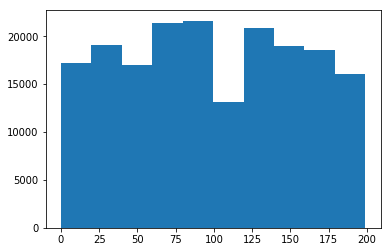

In [22]:
from sklearn.cluster import KMeans
num_clusters = 200
kmeans = KMeans(n_clusters=num_clusters)

cluster = kmeans.fit_predict(df[['longitude','latitude']])

plt.figure()
plt.hist(cluster)
plt.show()
plt.rcParams['savefig.dpi'] = 500

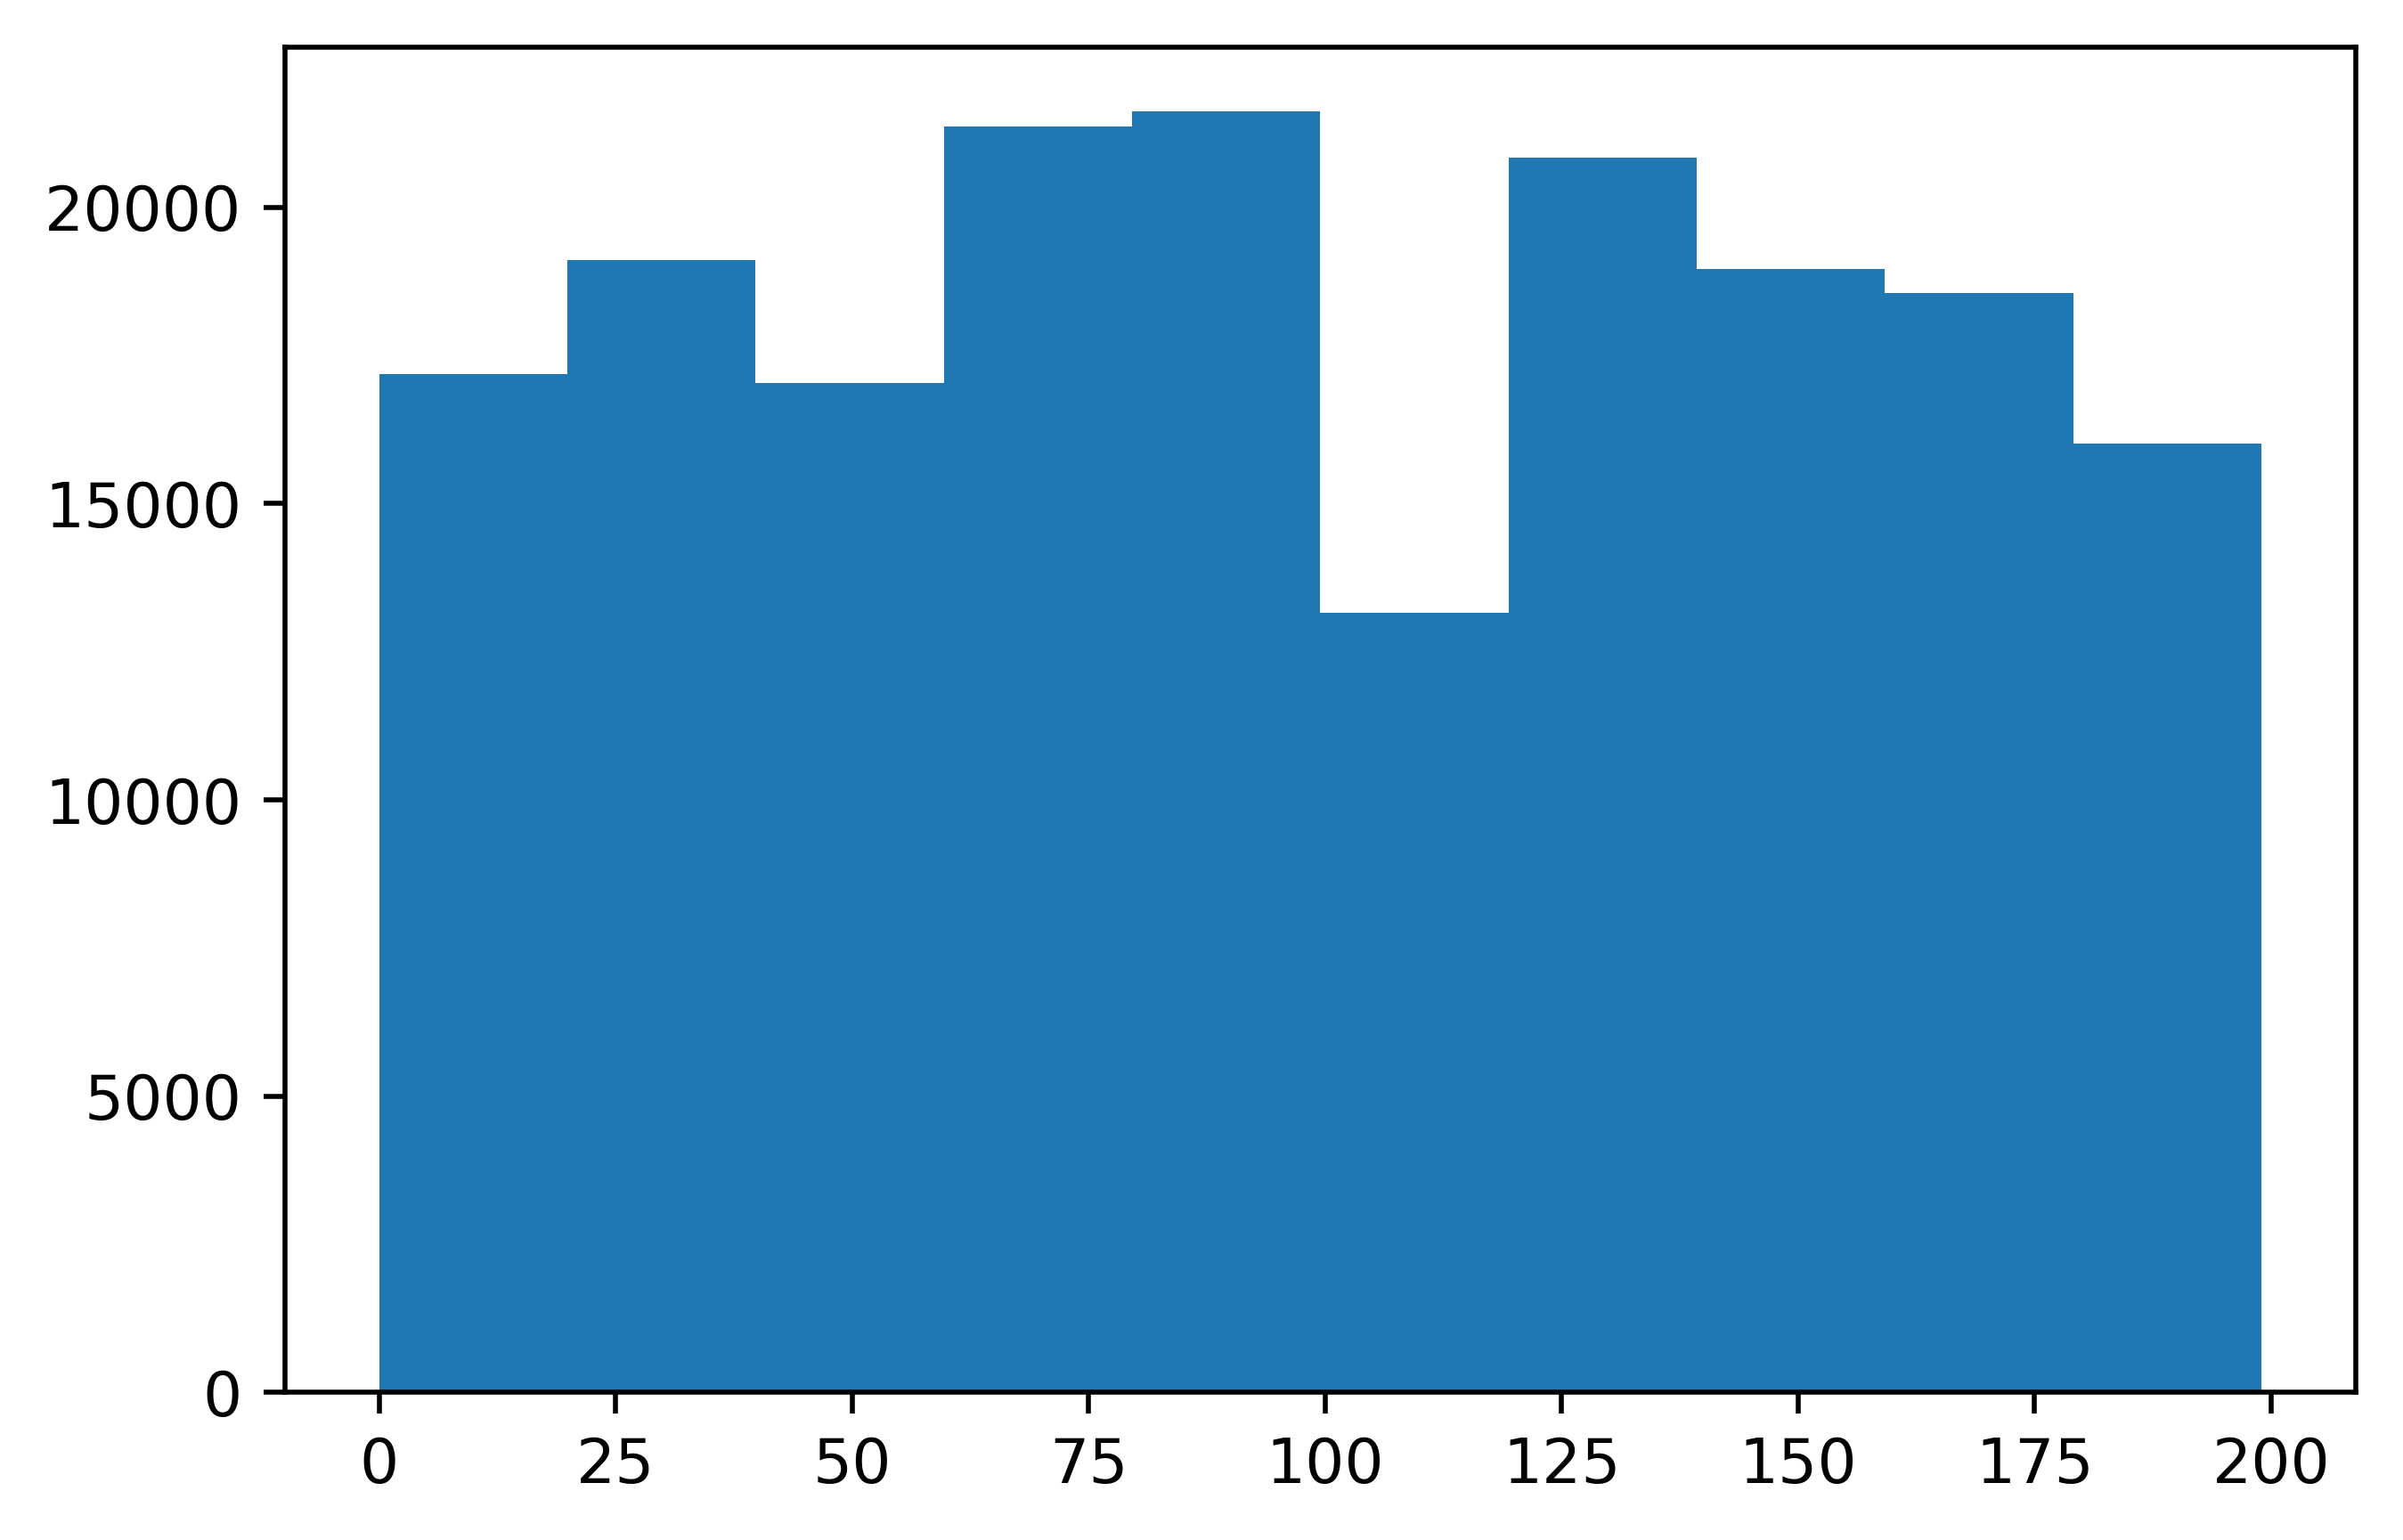

In [23]:
plt.figure()
plt.hist(cluster)
plt.show()
plt.rcParams['savefig.dpi'] = 500

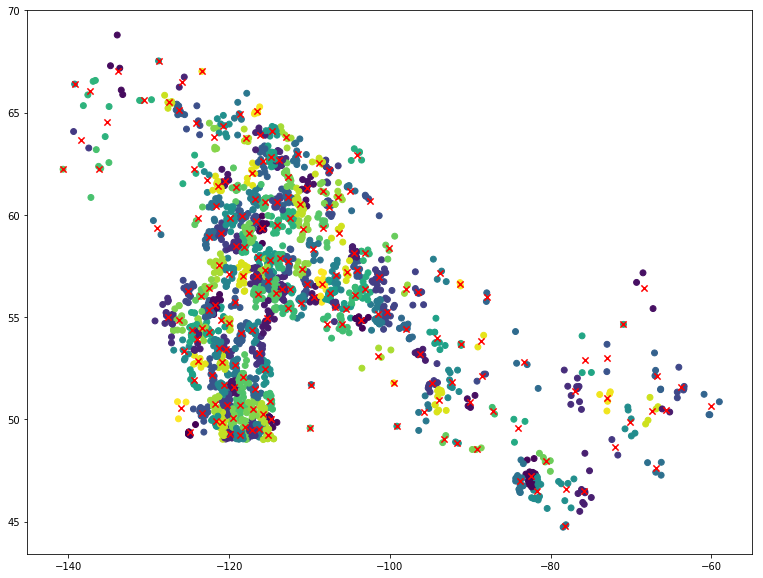

In [40]:
fig, ax = plt.subplots(figsize=(13, 10))
#ax[1].figure()
plt.scatter(df['longitude'], df[ 'latitude'], c=cluster, s=35)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=39, linewidths=2,
                color='r', zorder=10)
plt.show()

In [22]:
from mpl_toolkits.basemap import Basemap

ImportError: No module named 'mpl_toolkits.basemap'

In [23]:
m = Basemap(projection='lcc',
            resolution="c",width=7000000.,height=3500000., lat_0=59.839295,lon_0=-100.722656)
#lat_1=67.838273,lon_1=-142.910156,
m.fillcontinents(color='lightgray',zorder=0)
x, y = m(allFiresY, allFiresX)

wx,wy = m(centroids[:, 0], centroids[:, 1])

m.scatter(wx, wy,0.15,color='b')
m.scatter(x, y,0.05,color='r')
m.drawcoastlines()
m.drawstates()
m.drawcountries()
plt.title("Optimal Wind Farm Locations")
plt.show()
plt.rcParams['savefig.dpi'] = 500

NameError: name 'Basemap' is not defined

In [24]:
from sklearn.cluster import MeanShift

In [ ]:
num_clusters = 200
meanShift = MeanShift(cluster_all=True)

cluster = meanShift.fit_predict(df[['longitude','latitude']])

plt.figure()
plt.hist(cluster)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
num_clusters = 200
agc = AgglomerativeClustering(n_clusters=num_clusters)

agcluster = agc.fit_predict(df[['longitude','latitude']])

plt.figure()
plt.hist(agcluster)
plt.show()

In [44]:
def to_codebook(X, part):
    """
    Calculates centroids according to flat cluster assignment

    Parameters
    ----------
    X : array, (n, d)
        The n original observations with d features

    part : array, (n)
        Partition vector. p[n]=c is the cluster assigned to observation n

    Returns
    -------
    codebook : array, (k, d)
        Returns a k x d codebook with k centroids
    """
    codebook = []

    for i in range(part.min(), part.max()+1):
        codebook.append(X[part == i].mean(0))

    return np.vstack(codebook)

In [45]:
fig, ax = plt.subplots(figsize=(13, 10))
#ax[1].figure()
plt.scatter(df['longitude'], df[ 'latitude'], c=agcluster, s=35)
agcentroids = agcluster.labels_
plt.scatter(agcentroids[:, 0], agcentroids[:, 1],
                marker='x', s=39, linewidths=2,
                color='r', zorder=10)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'labels_'